# EDA Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1 = 'data/plant_pollinator_diversity_set1.csv'
file2 = 'data/plant_pollinator_diversity_set2.csv'

In [3]:
df1 = pd.read_csv(file1)
df1.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES
0,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1,NaN
1,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1,NaN
2,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1,NaN
3,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2,NaN
4,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1,NaN


In [4]:
df2 = pd.read_csv(file2)
df2.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,FLW_STATUS,PLTSP_CODE,PLTSP_NAME,NO_STALK,NO_FLWS,QC_NOTES
0,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-20,1.0,ND,1,NaN,NaN,NaN,NaN,NaN,NaN
1,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ACHIMILL,Achillea millefolium,4.0,36.0,NaN
2,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ERIGFOLI,Erigeron foliosus,14.0,1.0,NaN
3,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,VICIAMER,Vicia americana,3.0,2.3,NaN
4,SA026,2,Bunchgrass,BD,BGD01,2011,2011-08-02,3.0,"Andy, Tim",1,FLW,ACHIMILL,Achillea millefolium,2.0,26.0,NaN


## Some Data Cleaning

In [5]:
# Drop unnecessary/redundant columns for our data analysis

def drop_columns(dataframe, todrop):
    # dataframe: Pandas Dataset to drop columns from
    # todrop: list of columns to drop
    df = dataframe.drop(todrop, axis=1)
    return df

In [6]:
drop_cols_1 = ['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'START_TIME', 'END_TIME', 'MINUTE', 'OBSERVER', 'QC_NOTES']
drop_cols_2 = ['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'YEAR', 'OBSERVER', 'QC_NOTES']

df1 = drop_columns(df1, drop_cols_1)
df2 = drop_columns(df2, drop_cols_2)
df1.head()

,PLOT_ID,YEAR,SAMPLEDATE,WATCH,PLOT,CLOUDS,WIND,TEMP,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO
0,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1
1,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1
2,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1
3,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2
4,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1


In [7]:
# Merge datasets (union on PLOT_ID)
dff = df1.merge(df2, on=['PLOT_ID', 'SAMPLEDATE', 'PLTSP_CODE', 'PLTSP_NAME', 'PLOT', 'WATCH'], how='outer')
dff.head()

,PLOT_ID,YEAR,SAMPLEDATE,WATCH,PLOT,CLOUDS,WIND,TEMP,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,FLW_STATUS,NO_STALK,NO_FLWS
0,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1.0,NaN,NaN,NaN
1,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1.0,NaN,NaN,NaN
2,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,1.0,ACHIMILL,Achillea millefolium,ANTHASP1,Anthaxia sp 1,herbivorous beetle,NaN,1.0,NaN,NaN,NaN
3,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,1.0,ACHIMILL,Achillea millefolium,ERISHIRT,Eristalis hirtus,decomposer hover-fly,NaN,1.0,NaN,NaN,NaN
4,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1.0,NaN,NaN,NaN


In [8]:
# Drop NaNs
dff = dff.dropna(subset=['TEMP', 'FLW_STATUS', 'NO_STALK', 'NO_FLWS'])
dff.sample(15)

,PLOT_ID,YEAR,SAMPLEDATE,WATCH,PLOT,CLOUDS,WIND,TEMP,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,FLW_STATUS,NO_STALK,NO_FLWS
56918,LOS02,2018.0,2018-07-02,1.0,2,S,BR,12.0,1.0,3.0,GILICAPI,Gilia capitata,BOMBMIXT,Bombus mixtus,NaN,NaN,3.0,FLW,76.0,2.7
34751,FM209,2018.0,2018-07-24,4.0,9,S,ST,18.0,1.0,4.0,ERIOLANA,Eriophyllum lanatum,BOMBBIFA,Bombus bifarius,NaN,NaN,1.0,FLW,18.0,1.0
72157,RP206,2018.0,2018-06-27,1.0,6,S,BR,19.0,1.0,2.0,GILICAPI,Gilia capitata,APISMELL,Apis mellifera,NaN,NaN,1.0,FLW,79.0,1.4
39128,FNE06,2017.0,2017-06-30,2.0,6,S,ST,25.0,1.0,3.0,MAIASTEL,Maianthemum stellatum,PODOSCRI,Podonia scripta,NaN,NaN,1.0,FLW,124.0,3.9
41069,FNE10,2015.0,2015-06-30,2.0,10,S,ST,29.0,1.0,1.0,ERIGALFO,Erigeron aliceae & foliosus,EPICPUNC,Epicauta puncticollis,predaceous beetle,field id,1.0,FLW,3.0,12.0
37534,FNE03,2017.0,2017-07-28,5.0,3,S,ST,23.0,1.0,1.0,HIERCYNO,Hieracium cynoglossoides,EPICPUNC,Epicauta puncticollis,NaN,NaN,1.0,FLW,4.0,1.3
12217,CPM01,2016.0,2016-07-20,4.0,1,S,BR,22.0,1.0,6.0,ERIOLANA,Eriophyllum lanatum,APISMELL,Apis mellifera,social bee,no number,1.0,FLW,60.0,2.9
36247,FNE01,2018.0,2018-07-03,2.0,1,S,ST,18.0,1.0,3.0,GILICAPI,Gilia capitata,APISMELL,Apis mellifera,NaN,NaN,3.0,FLW,87.0,1.6
27100,FM203,2018.0,2018-06-19,1.0,3,PC,BR,25.0,1.0,10.0,DELPNUTT,Delphinium nuttallianum,BOMBMIXT,Bombus mixtus,NaN,NaN,1.0,FLW,75.0,3.0
15247,CPM07,2017.0,2017-07-17,4.0,7,S,ST,22.0,1.0,2.0,PHACHAST,Phacelia hastata,BOMBMIXT,Bombus mixtus,NaN,NaN,1.0,FLW,29.0,6.7


## Preliminary Visualization

#### Scatterplots

In [9]:
dff18 = dff[dff['YEAR'] == 2018]
px.scatter(dff18, x='TEMP', y='NO_STALK', symbol='CLOUDS', color='WIND', title='No. of Stalks vs Temperature in 2018')

In [10]:
px.scatter(dff18, x='TEMP', y='NO_FLWS', symbol='CLOUDS', color='WIND', title='No. of Flowers vs Temperature in 2018')

In [11]:
px.scatter(dff18, x='TEMP', y='NO_INT', symbol='CLOUDS', color='WIND', title='No. of Interactions vs Temperature in 2018')

In [12]:
px.scatter(dff18, x='NO_FLWS', y='NO_INT', symbol='CLOUDS', color='WIND', title='No. of Interactions vs Temperature in 2018')

In [13]:
# Encoding values to numbers for easier analysis

dff_encoded = dff.replace({
    'WIND': {
        'BR': 1,
        'ST': 0
    },  
    'CLOUDS': {
        'SH': 0,
        'PC': 1,
        'C':  2,
        'S':  3,
    },
    'FLW_STATUS': {
        'FLW': 1,
        'NOF': 0
    }
})

### Correlation Matrix

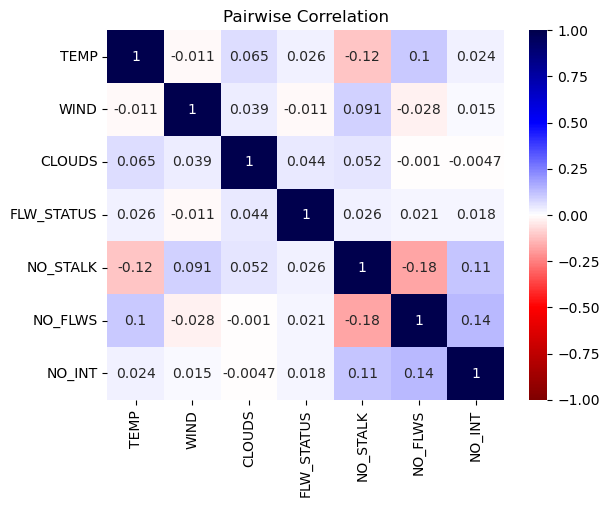

In [14]:
dff_corr = dff_encoded[['TEMP', 'WIND', 'CLOUDS', 'FLW_STATUS',  'NO_STALK', 'NO_FLWS', 'NO_INT']].corr()
sns.heatmap(data=dff_corr, annot=True, vmin=-1, vmax=1, cmap='seismic_r').set(title='Pairwise Correlation')
plt.show()

### Heatmaps

In [15]:
dff_heat = dff[['NO_INT', 'PLTSP_NAME', 'VISSP_NAME']]

grouped_dff = dff_heat.groupby(['PLTSP_NAME', 'VISSP_NAME']).agg({'NO_INT': ['mean', 'min', 'max']})
grouped_dff.columns = ['int_mean', 'int_min', 'int_max']
grouped_dff = grouped_dff.reset_index()
grouped_dff

,PLTSP_NAME,VISSP_NAME,int_mean,int_min,int_max
0,Achillea millefolium,Acridid sp 1,1.000000,1.0,1.0
1,Achillea millefolium,Ammophila sp 1,1.000000,1.0,1.0
2,Achillea millefolium,Anaspis rufa,1.857143,1.0,2.0
3,Achillea millefolium,Anastrangalia laetifica,1.000000,1.0,1.0
4,Achillea millefolium,Anthrenus sp 17-1,1.000000,1.0,1.0
...,...,...,...,...,...
2103,Zigadenus venenosus,Syrphid sp B,7.200000,5.0,10.0
2104,Zigadenus venenosus,Syrphidae,5.500000,1.0,10.0
2105,Zigadenus venenosus,Syrphus vitripennis,1.000000,1.0,1.0
2106,Zigadenus venenosus,Tapinoma sessile,1.000000,1.0,1.0


In [16]:
dff_heat = dff_heat[dff_heat['NO_INT'] >= 15.0]

grouped_dff = dff_heat.groupby(['PLTSP_NAME', 'VISSP_NAME']).agg({'NO_INT': ['mean', 'min', 'max']})
grouped_dff.columns = ['int_mean', 'int_min', 'int_max']
grouped_dff = grouped_dff.reset_index()
grouped_dff.head()

,PLTSP_NAME,VISSP_NAME,int_mean,int_min,int_max
0,Achillea millefolium,Mordella atrata albosuturalis,15.000000,15.0,15.0
1,Angelica arguta,Apis mellifera,20.717391,15.0,33.0
2,Angelica arguta,Bombus bifarius,18.000000,16.0,19.0
3,Boykinia major,Apis mellifera,19.500000,15.0,30.0
4,Calochortus subalpinus,Apis mellifera,17.000000,15.0,19.0


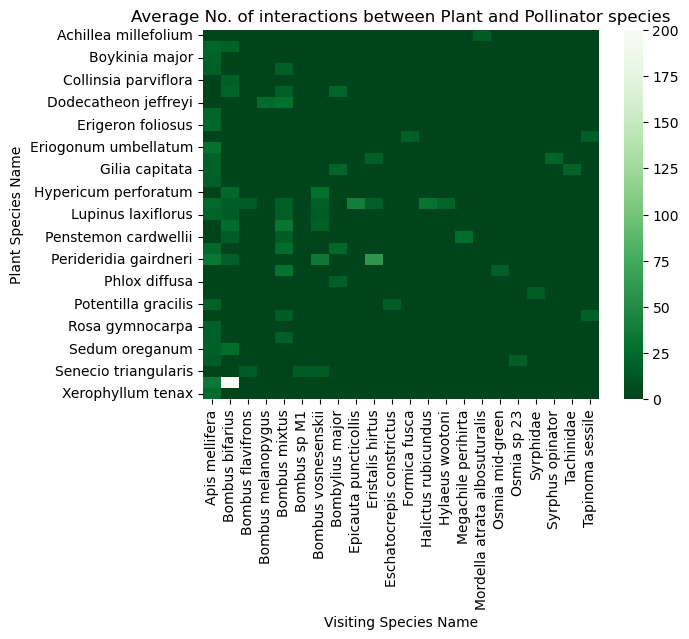

In [17]:
grouped_pivot = grouped_dff.pivot_table('int_mean','PLTSP_NAME','VISSP_NAME').fillna(0)
sns.heatmap(grouped_pivot, cmap='Greens_r')
plt.xlabel('Visiting Species Name')
plt.ylabel('Plant Species Name')
plt.title('Average No. of interactions between Plant and Pollinator species')

plt.show()

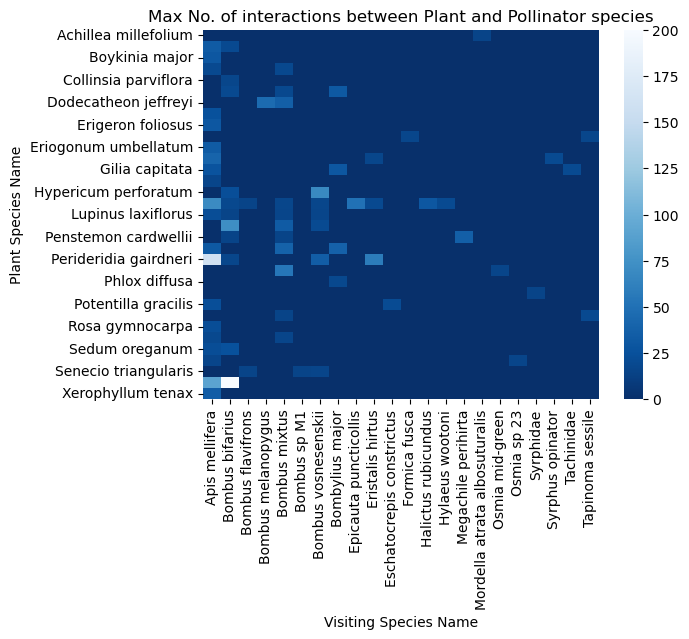

In [18]:
grouped_pivot = grouped_dff.pivot_table('int_max','PLTSP_NAME','VISSP_NAME').fillna(0)
sns.heatmap(grouped_pivot, cmap='Blues_r')
plt.xlabel('Visiting Species Name')
plt.ylabel('Plant Species Name')
plt.title('Max No. of interactions between Plant and Pollinator species')

plt.show()

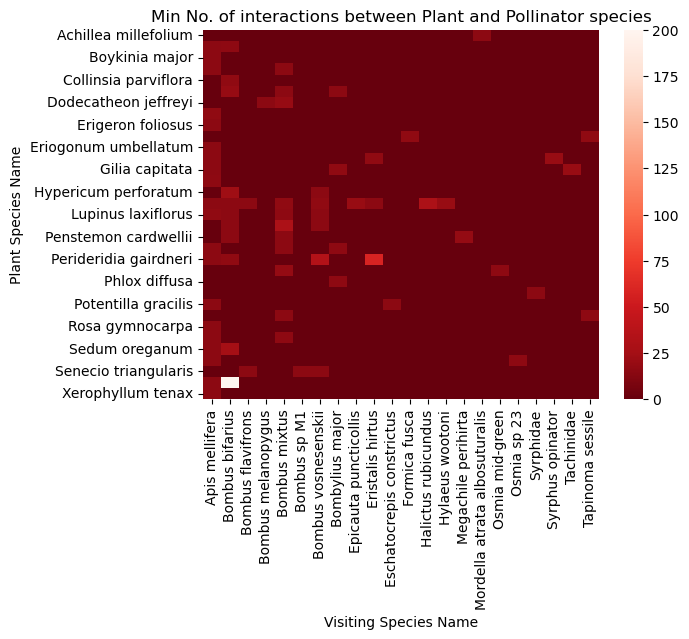

In [19]:
grouped_pivot = grouped_dff.pivot_table('int_min','PLTSP_NAME','VISSP_NAME').fillna(0)
sns.heatmap(grouped_pivot, cmap='Reds_r')
plt.xlabel('Visiting Species Name')
plt.ylabel('Plant Species Name')
plt.title('Min No. of interactions between Plant and Pollinator species')

plt.show()